In [166]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
import re
import plotly.graph_objects as go
import plotly.express as px

In [95]:
data = pd.read_csv('Car details v3.csv')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


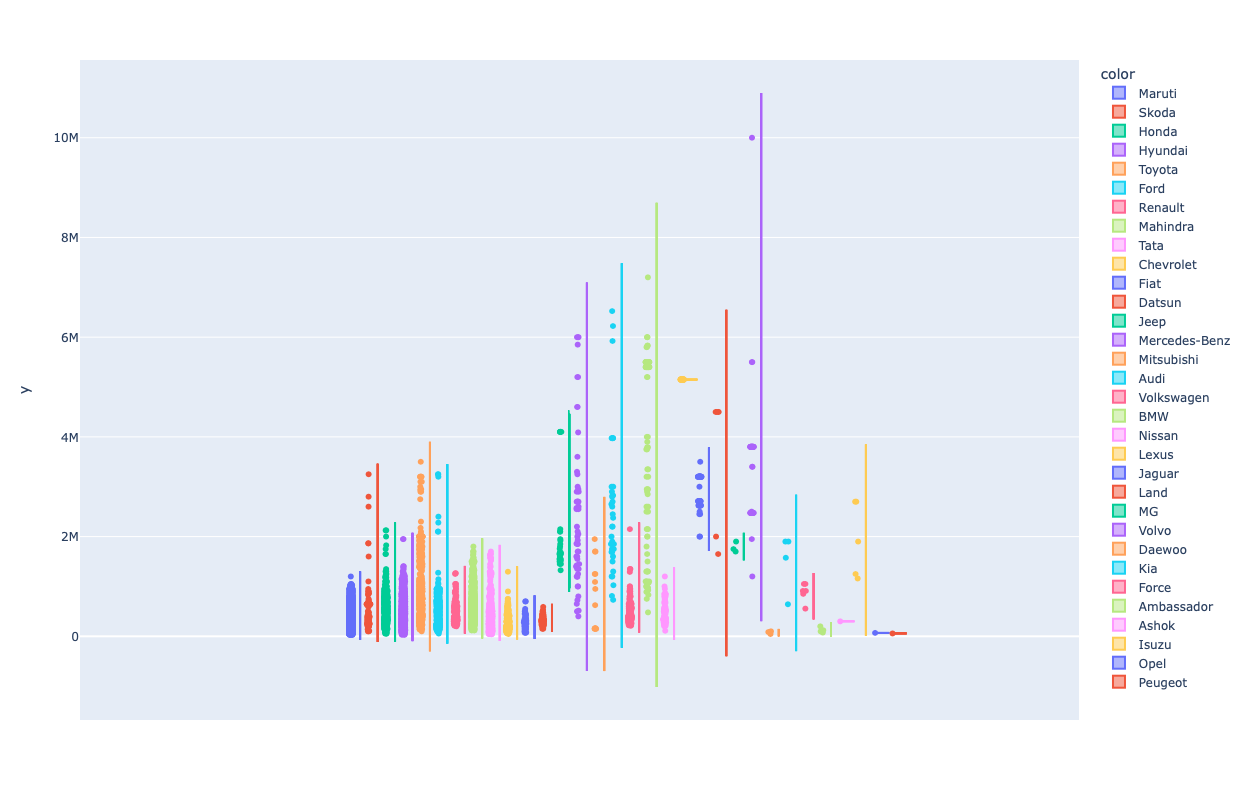

In [ ]:
temp_names = data['name'].str.split(expand=True)[0]
fig = px.violin(y=data['selling_price'], color=temp_names, height=800, points='all')
fig.show()

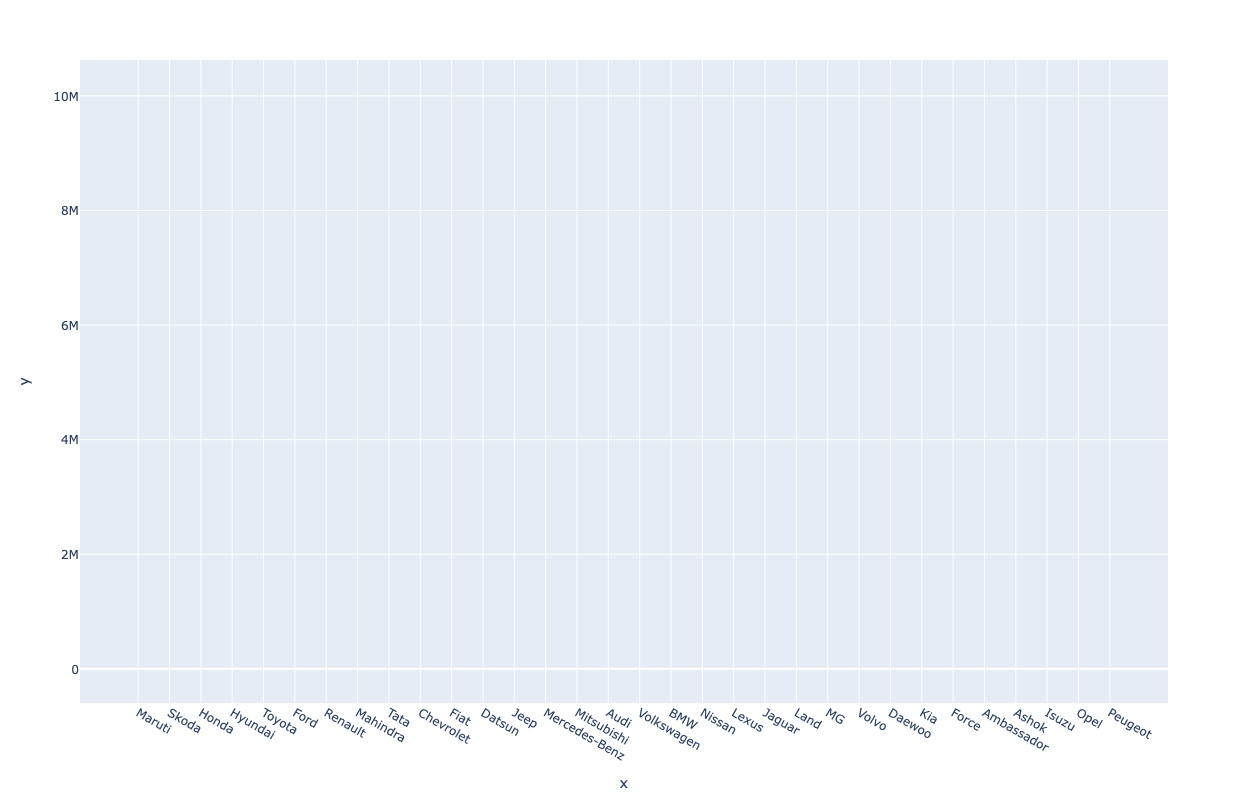

In [178]:
temp_names = data['name'].str.split(expand=True)[0]
fig = px.scatter(x=temp_names, y=data['selling_price'], height=800)
fig.show()

# **ПОИСК ПОВТОРЯЮЩИХСЯ ЗНАЧЕНИЙ СРЕДИ НЕ ЧИСЛЕННЫХ**

**1. МАРКИ АВТОМОБИЛЕЙ**

In [89]:
names = data['name'].str.split(expand=True).iloc[:, 0].unique()
print(names)
len(names)

['Maruti' 'Skoda' 'Honda' 'Hyundai' 'Toyota' 'Ford' 'Renault' 'Mahindra'
 'Tata' 'Chevrolet' 'Fiat' 'Datsun' 'Jeep' 'Mercedes-Benz' 'Mitsubishi'
 'Audi' 'Volkswagen' 'BMW' 'Nissan' 'Lexus' 'Jaguar' 'Land' 'MG' 'Volvo'
 'Daewoo' 'Kia' 'Force' 'Ambassador' 'Ashok' 'Isuzu' 'Opel' 'Peugeot']


32

In [90]:
names_proc = data['name'].str.split(expand=True)[[0]]
for each in names:
    np_col = np.array([[1] if each == names_proc.iloc[i, 0] else [0] for i in range(len(data))])
    names_proc[each] = np_col

data_processed = pd.concat([names_proc.iloc[:, 1:], data.iloc[:, 1:]], axis=1, join='inner')

In [114]:
temp_data = pd.DataFrame()
brands_vec = data['name'].str.split(expand=True)[[0]]
for brand in data['name'].str.split(expand=True).iloc[:, 0].unique()[:-1]:
    temp_data[f'brand_{brand}'] = brands_vec[0].apply(lambda x: int(x == brand))

In [115]:
data_processed = pd.concat([temp_data.iloc[:, 1:], data.iloc[:, 1:]], axis=1, join='inner')
data_processed.columns

Index(['brand_Skoda', 'brand_Honda', 'brand_Hyundai', 'brand_Toyota',
       'brand_Ford', 'brand_Renault', 'brand_Mahindra', 'brand_Tata',
       'brand_Chevrolet', 'brand_Fiat', 'brand_Datsun', 'brand_Jeep',
       'brand_Mercedes-Benz', 'brand_Mitsubishi', 'brand_Audi',
       'brand_Volkswagen', 'brand_BMW', 'brand_Nissan', 'brand_Lexus',
       'brand_Jaguar', 'brand_Land', 'brand_MG', 'brand_Volvo', 'brand_Daewoo',
       'brand_Kia', 'brand_Force', 'brand_Ambassador', 'brand_Ashok',
       'brand_Isuzu', 'brand_Opel', 'year', 'selling_price', 'km_driven',
       'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine',
       'max_power', 'torque', 'seats'],
      dtype='object')

**2. ТРАНСМИССИЯ**

In [12]:
transmission = data['transmission'].unique()
transmission

array(['Manual', 'Automatic'], dtype=object)

In [13]:
for each in transmission:
    np_col = np.array([[1] if each == data.loc[i, 'transmission'] else [0] for i in range(len(data))])
    data_processed[each] = np_col
try:
    data_processed = data_processed.drop('transmission', axis=1)
except KeyError:
    pass
data_processed

,Maruti,Skoda,Honda,Hyundai,Toyota,Ford,Renault,Mahindra,Tata,Chevrolet,...,fuel,seller_type,owner,mileage,engine,max_power,torque,seats,Manual,Automatic
0,1,0,0,0,0,0,0,0,0,0,...,Diesel,Individual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,Diesel,Individual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,Petrol,Individual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,1,0
3,0,0,0,1,0,0,0,0,0,0,...,Diesel,Individual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,Petrol,Individual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,0,0,0,1,0,0,0,0,0,0,...,Petrol,Individual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0,1,0
8124,0,0,0,1,0,0,0,0,0,0,...,Diesel,Individual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0,1,0
8125,1,0,0,0,0,0,0,0,0,0,...,Diesel,Individual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0,1,0
8126,0,0,0,0,0,0,0,0,1,0,...,Diesel,Individual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0,1,0


**3. ВЛАДЕЛЕЦ**

In [14]:
owner = data['owner'].unique()
owner

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [15]:
for each in owner:
    np_col = np.array([[1] if each == data.loc[i, 'owner'] else [0] for i in range(len(data))])
    data_processed[each] = np_col
try:
    data_processed = data_processed.drop('owner', axis=1)
except KeyError:
    pass
data_processed

,Maruti,Skoda,Honda,Hyundai,Toyota,Ford,Renault,Mahindra,Tata,Chevrolet,...,max_power,torque,seats,Manual,Automatic,First Owner,Second Owner,Third Owner,Fourth & Above Owner,Test Drive Car
0,1,0,0,0,0,0,0,0,0,0,...,74 bhp,190Nm@ 2000rpm,5.0,1,0,1,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,103.52 bhp,250Nm@ 1500-2500rpm,5.0,1,0,0,1,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,1,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0,0,0,...,90 bhp,22.4 kgm at 1750-2750rpm,5.0,1,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,0,0,0,1,0,0,0,0,0,0,...,82.85 bhp,113.7Nm@ 4000rpm,5.0,1,0,1,0,0,0,0
8124,0,0,0,1,0,0,0,0,0,0,...,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0,1,0,0,0,0,1,0
8125,1,0,0,0,0,0,0,0,0,0,...,73.9 bhp,190Nm@ 2000rpm,5.0,1,0,1,0,0,0,0
8126,0,0,0,0,0,0,0,0,1,0,...,70 bhp,140Nm@ 1800-3000rpm,5.0,1,0,1,0,0,0,0


**4. РАСХОД БЕНЗИНА И БЕНЗИН (mileage)**

In [116]:
milage_check = data['mileage'].str.split(expand=True)
km_p_kg_index = milage_check.loc[milage_check[1] == 'km/kg'].index
data_diesel = data.iloc[km_p_kg_index]
data_diesel[['fuel', 'mileage']]

,fuel,mileage
6,LPG,17.3 km/kg
35,CNG,33.44 km/kg
90,LPG,26.2 km/kg
203,CNG,26.6 km/kg
402,CNG,20.88 km/kg
...,...,...
7308,CNG,26.83 km/kg
7543,CNG,33.44 km/kg
7642,LPG,13.2 km/kg
7733,CNG,21.94 km/kg


In [17]:
len(data.loc[(data['fuel'] == 'Diesel')&(data['fuel'] == 'Petrol')])

0

In [18]:
milage = data['mileage'].str.split(expand=True).iloc[:, 0]
data_processed['mileage'] = milage
data_processed['mileage'] = pd.to_numeric(data_processed['mileage'], errors='coerce')

In [122]:
units_milage = data['mileage'].str.split(expand=True).iloc[:, 1]
temp_data = pd.DataFrame({'fuel': data['fuel'], 'units': units_milage})
temp_data.value_counts()

fuel    units
Diesel  kmpl     4299
Petrol  kmpl     3520
CNG     km/kg      53
LPG     km/kg      35
dtype: int64

**5. ОБЬЕМ ДВИГАТЕЛЯ**

In [148]:
engine = data['engine'].str.split(expand=True).iloc[:, 0]
data_processed['engine'] = engine
data_processed['engine'] = pd.to_numeric(data_processed['engine'], errors='coerce')
engine_unit = data['engine'].str.split(expand=True).iloc[:, 1]


<AxesSubplot: >

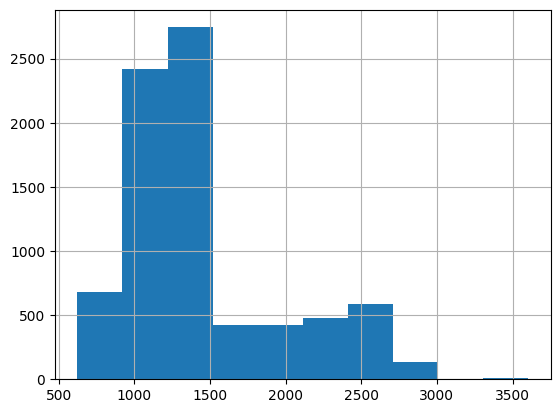

In [145]:
engine.dropna().apply(lambda x: int(x)).hist(bins=10)

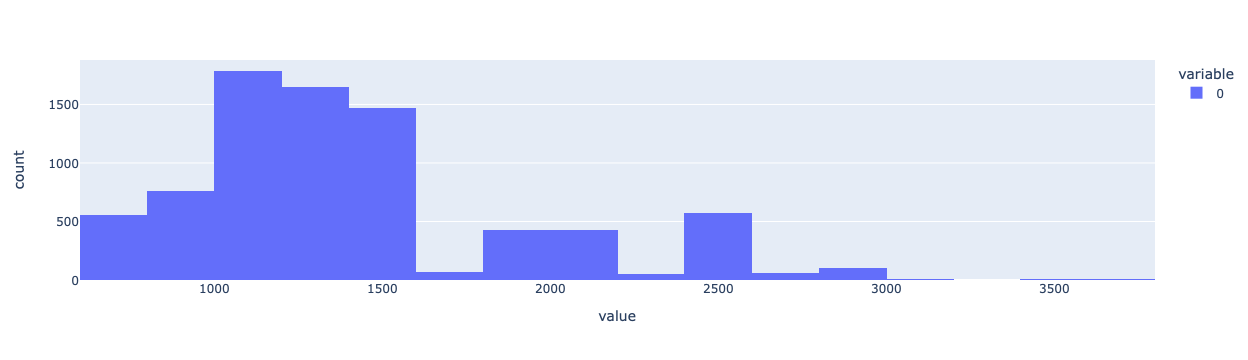

In [146]:
fig = px.histogram(engine.dropna().apply(lambda x: int(x)), nbins=20)
fig.show()

**6. МОЩНОСТЬ В ЛОШАДЯХ**

In [20]:
power = data['max_power'].str.replace('bhp', '', regex=False)
power = pd.to_numeric(power, errors='coerce')
print(power.isna().sum())
data['max_power'].isna().sum()

216


215

In [163]:
data['max_power'].str.split(expand=True)[1].unique()

array(['bhp', nan, None], dtype=object)

In [21]:
compare = power.isna() == data['max_power'].isna()
compare.loc[compare == False]

4933    False
Name: max_power, dtype: bool

In [22]:
data.iloc[4933]

name             Maruti Omni CNG
year                        2000
selling_price              80000
km_driven                 100000
fuel                         CNG
seller_type           Individual
transmission              Manual
owner               Second Owner
mileage               10.9 km/kg
engine                    796 CC
max_power                    bhp
torque                       NaN
seats                        8.0
Name: 4933, dtype: object

In [23]:
power.iloc[4933]

nan

In [40]:
data_processed['max_power'] = power

**7. КРУТЯЩИЙ МОМЕНТ**

In [164]:
torque = data['torque'].str.lower()
newt_meter = torque.str.contains('nm', regex=False)

In [165]:
torque = torque.str.replace(',', '.', regex=False).str.replace(' ', '', regex=False)
torque = torque.str.findall(r'\d[0-9.]*\d')
print(newt_meter)
torque

0        True
1        True
2       False
3       False
4       False
        ...  
8123     True
8124    False
8125     True
8126     True
8127     True
Name: torque, Length: 8128, dtype: object


0              [190, 2000]
1        [250, 1500, 2500]
2            [12.7, 2.700]
3       [22.4, 1750, 2750]
4            [11.5, 4.500]
               ...        
8123         [113.7, 4000]
8124    [24, 1.900, 2.750]
8125           [190, 2000]
8126     [140, 1800, 3000]
8127     [140, 1800, 3000]
Name: torque, Length: 8128, dtype: object

In [81]:
def torque_process(torque_list, newt_meter):
    torque_list = list(map(float, torque_list))
    if not newt_meter:
        torque_list[0] = 10 * torque_list[0]
    if len(torque_list) == 3:
        rpm = (torque_list[1] + torque_list[2]) / 2
    elif len(torque_list) == 2:
        rpm = torque_list[1]
    else:
        rpm = torque_list[0]
    if rpm < 10:
        rpm *= 1000
    return torque_list[0], rpm

In [84]:
max_power_np = np.array([])
for i in range(len(torque)):
    if type(torque[i]) == float:
        tor, r = np.nan, np.nan
    else:
        tor, r = torque_process(torque[i], newt_meter[i])
    max_power_np = np.array([tor, r]) if len(max_power_np) == 0 else np.vstack((max_power_np, np.array([tor, r])))
max_power_np
data_processed['torque'] = max_power_np[:, 0]
data_processed['RPM'] = max_power_np[:, 1]

In [85]:
data_processed

,Maruti,Skoda,Honda,Hyundai,Toyota,Ford,Renault,Mahindra,Tata,Chevrolet,...,torque,seats,Manual,Automatic,First Owner,Second Owner,Third Owner,Fourth & Above Owner,Test Drive Car,RPM
0,1,0,0,0,0,0,0,0,0,0,...,190.0,5.0,1,0,1,0,0,0,0,2000.0
1,0,1,0,0,0,0,0,0,0,0,...,250.0,5.0,1,0,0,1,0,0,0,2000.0
2,0,0,1,0,0,0,0,0,0,0,...,127.0,5.0,1,0,0,0,1,0,0,2700.0
3,0,0,0,1,0,0,0,0,0,0,...,224.0,5.0,1,0,1,0,0,0,0,2250.0
4,1,0,0,0,0,0,0,0,0,0,...,115.0,5.0,1,0,1,0,0,0,0,4500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,0,0,0,1,0,0,0,0,0,0,...,113.7,5.0,1,0,1,0,0,0,0,4000.0
8124,0,0,0,1,0,0,0,0,0,0,...,240.0,5.0,1,0,0,0,0,1,0,2325.0
8125,1,0,0,0,0,0,0,0,0,0,...,190.0,5.0,1,0,1,0,0,0,0,2000.0
8126,0,0,0,0,0,0,0,0,1,0,...,140.0,5.0,1,0,1,0,0,0,0,2400.0


In [ ]:
data_processed.to_cav

In [153]:
nan_df = data.loc[data['engine'].isna()]
unique_names_nan = nan_df['name'].unique()
unique_names_nan

array(['Maruti Swift 1.3 VXi', 'Fiat Palio 1.2 ELX', 'Tata Indica DLS',
       'Maruti Swift VDI BSIV W ABS', 'Maruti Swift VDI BSIV',
       'BMW X1 sDrive 20D xLine', 'Toyota Etios GD',
       'Maruti Omni E 8 Str STD', 'Mahindra Willys CJ 3B 4X4',
       'Hyundai Santro Xing XL', 'Toyota Etios Liva Diesel TRD Sportivo',
       'Maruti Estilo LXI', 'Maruti Alto K10 LXI',
       'Hyundai Santro Xing XG', 'Mahindra Bolero GLX',
       'Maruti Zen Estilo VXI BSIV W ABS', 'Hyundai Santro Xing XP',
       'Hyundai Santro GLS I - Euro I', 'Skoda Superb 1.8 TSI',
       'Maruti Esteem Vxi - BSII', 'Mahindra Xylo E8 BS4',
       'Fiat Punto 1.3 Emotion', 'Toyota Qualis Fleet A3',
       'Hyundai Santro GLS I - Euro II',
       'Hyundai Santro Xing XG AT eRLX Euro III', 'Toyota Etios Liva GD',
       'Maruti Omni BSIII 8-STR W/ IMMOBILISER', 'Mahindra Jeep Classic',
       'Hyundai Santro GS zipDrive - Euro II', 'Mahindra Ingenio CRDe',
       'Mahindra Jeep CL 500 MDI', 'Maruti Swift Dzire V

In [157]:
good_names = data.loc[
    (data['name'].isin(unique_names_nan))
    & (data['engine'].notna())
]['name'].unique()

In [159]:
data.loc[
    (data['engine'].isna())
    & (data['name'].isin(good_names))
]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
119,Maruti Swift VDI BSIV,2010,300000,120000,Diesel,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
200,Toyota Etios GD,2012,235000,120000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
206,Maruti Omni E 8 Str STD,2003,40000,90000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
516,Maruti Swift VDI BSIV,2010,330000,110000,Diesel,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
539,Maruti Swift VDI BSIV,2008,229999,50000,Diesel,Individual,Manual,Third Owner,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7086,Toyota Etios Liva G,2012,200000,120000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
7302,Toyota Etios VD,2012,400000,74500,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
7361,Maruti Swift VDI BSIV,2010,352000,72179,Diesel,Dealer,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
7651,Maruti Swift VDI BSIV,2014,217000,50000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN


# **TODO:**

1. удалить авто у которых LPG и CNG как тип топлива
2. удалить или заменить (выбрать) на медианные значениие (или средние) для NaN в датасете (для числовых значений)
3. заменить данные для отсутствующих марок (двигатель, топливо... ), остальные либо удалить либо изменить на среднее
4. на счет RMP: реализовать как вычисление среднего; если строк, где указан диапазон rmp, много, то брать мин и макс; может вообще удалить
5. влияется ли признак на цену (scatter, violen, box plots) 